<a href="https://colab.research.google.com/github/MuhammedAnees-loony/Traffic-Volume-Prediction/blob/main/Traffic_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Traffic Volume Prediction**

---


Traffic congestion is a growing concern in urban areas around the world. Predicting traffic volume on road segments is critical for traffic management, infrastructure planning, and improving commuter experiences. The ability to anticipate high traffic volumes can help in optimizing traffic signals, planning road maintenance, and reducing travel time. With the advent of intelligent transportation systems and advancements in machine learning, it is possible to develop models that accurately forecast traffic patterns using historical data.

In this project, the objective is to predict future traffic volume on a specific road segment based on historical traffic data. We utilize a Long Short-Term Memory (LSTM) neural network, which is well-suited for time series forecasting due to its ability to learn temporal dependencies. The dataset used for this project is obtained from traffic monitoring systems and contains features such as date, time, and traffic volume.





# **Import Libraries**

---



In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping




In this initial step, we import various libraries necessary for data manipulation, visualization, and machine learning tasks.

1. Pandas: This library is crucial for data manipulation and analysis, allowing us to read data files, handle missing values, and perform operations such as filtering and grouping datasets.

2. NumPy: A library for numerical operations that supports large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.

3. Matplotlib and Seaborn: Visualization libraries where Matplotlib is used for basic plotting, and Seaborn provides a high-level interface for drawing attractive statistical graphics.

4. Scikit-learn: This library provides simple and efficient tools for data mining and analysis, used for preprocessing (like normalization) and splitting datasets.

5. Keras: A high-level neural networks API that runs on top of TensorFlow, simplifying the process of building deep learning models, including LSTMs (Long Short-Term Memory networks).

6. EarlyStopping: A Keras callback that monitors the validation loss during training. It stops the training process if the loss does not improve for a specified number of epochs, which helps prevent overfitting

# **Loading and Exploring the Dataset**





In [ ]:
# Upload dataset from local machine
from google.colab import files
uploaded = files.upload()

# Load the dataset (adjust the file name if needed)
df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

# Preview the dataset to check the 'date_time' format
df.head()



Saving Metro_Interstate_Traffic_Volume.csv to Metro_Interstate_Traffic_Volume.csv


,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,5545,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00
1,4516,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00
2,4767,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00
3,5026,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00
4,4918,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00


Here, we load the dataset into a DataFrame, which is a two-dimensional data structure similar to a table in a database or an Excel spreadsheet. Understanding the dataset's structure helps us identify its characteristics and any potential issues.

1. Load the Data: We read the dataset from a CSV file using pd.read_csv(). The file should contain historical traffic data.

2. Display Initial Rows: The head() function shows the first few rows of the DataFrame, providing a quick preview of the data structure.

3. Check Shape and Info: Using shape returns the dimensions of the DataFrame (number of rows and columns), while info() provides details about each column's data type and the count of non-null entries.

4. Descriptive Statistics: The describe() function summarizes numerical features, providing metrics such as mean, median, standard deviation, min, and max values. This helps identify potential outliers and understand data distributions.




# **Handling the 'date_time' Column**

In [ ]:
# Load the dataset
df = pd.read_csv('/content/Metro_Interstate_Traffic_Volume.csv')  # Update the path to your CSV file

# Convert 'date_time' to datetime format with the specified format
df['date_time'] = pd.to_datetime(df['date_time'], format='%d-%m-%Y %H:%M')

# Set 'date_time' as the index for time-series operations
df.set_index('date_time', inplace=True)

# Ensure the index is now a DatetimeIndex
if not isinstance(df.index, pd.DatetimeIndex):
    raise ValueError("Index is not a DatetimeIndex. Please check the conversion.")

# Create new features based on date_time
df['month'] = df.index.month
df['day_of_month'] = df.index.day
df['is_weekend'] = df.index.dayofweek >= 5  # 5 = Saturday, 6 = Sunday
df.head()


,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,month,day_of_month,is_weekend
date_time,,,,,,,,,,,
2012-10-02 09:00:00,5545,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,10,2,False
2012-10-02 10:00:00,4516,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,10,2,False
2012-10-02 11:00:00,4767,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,10,2,False
2012-10-02 12:00:00,5026,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,10,2,False
2012-10-02 13:00:00,4918,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,10,2,False


The 'date_time' column is critical for time-series analysis. Converting this column to a datetime format and setting it as the index allows for time-based operations like resampling, filtering, and grouping.

* Convert to Datetime: The pd.to_datetime() function transforms the 'date_time' string into a pandas datetime object. This allows us to work with time-based data more effectively.

* Set Index: By setting 'date_time' as the index using set_index(), we facilitate operations that rely on the time aspect of the data, which is essential for time-series forecasting.

# **Analyzing the Dataset**

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       48204 non-null  int64  
 1   holiday              61 non-null     object 
 2   temp                 48204 non-null  float64
 3   rain_1h              48204 non-null  float64
 4   snow_1h              48204 non-null  float64
 5   clouds_all           48204 non-null  int64  
 6   weather_main         48204 non-null  object 
 7   weather_description  48204 non-null  object 
 8   month                48204 non-null  int32  
 9   day_of_month         48204 non-null  int32  
 10  is_weekend           48204 non-null  bool   
dtypes: bool(1), float64(3), int32(2), int64(2), object(3)
memory usage: 3.7+ MB
None
       traffic_volume          temp       rain_1h       snow_1h    clouds_all  \
count    48204.000000  48204.000000  48

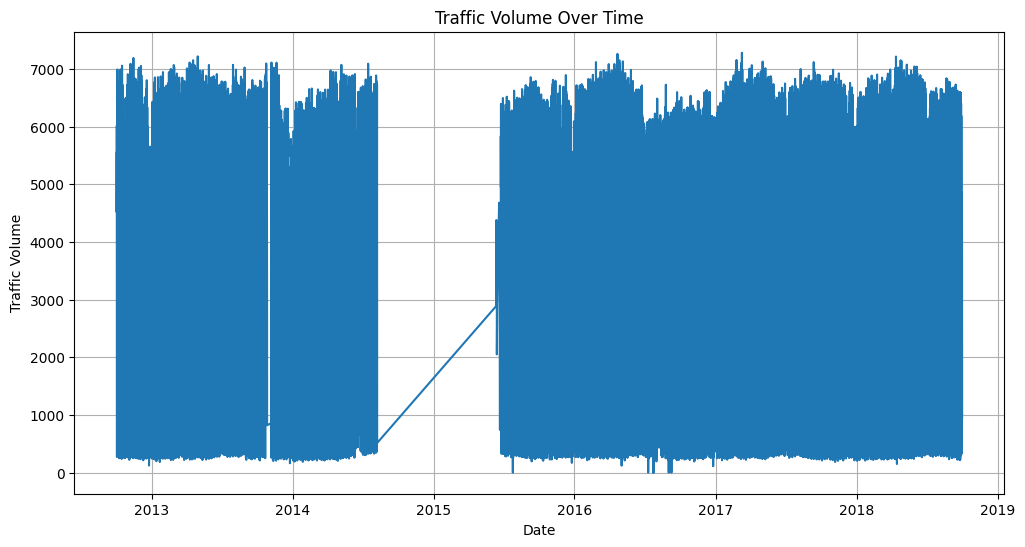

traffic_volume             0
holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
month                      0
day_of_month               0
is_weekend                 0
dtype: int64


In [ ]:
# Analyze the dataset
print(df.info())  # Overview of the dataset
print(df.describe())  # Statistical summary

# Visualize the traffic volume over time
plt.figure(figsize=(12, 6))
plt.plot(df['traffic_volume'])
plt.title('Traffic Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.grid()
plt.show()

# Check for missing values
print(df.isnull().sum())





---


Visualization helps us understand the data's distribution and characteristics. By analyzing the target variable (traffic volume), we can identify trends, seasonality, and outliers.

* Histogram with KDE: A histogram visualizes the distribution of traffic volume. The kernel density estimate (KDE) overlay provides a smoothed version of the histogram, making it easier to see the distribution shape. This helps identify any skewness, peaks, or outliers in the data.

* Insights: By examining the histogram, we can derive insights into how traffic volume behaves across different time periods, identifying peak times and potential anomalies.

# **Data Preprocessing and Normalization**

In [ ]:
# Handling the 'holiday' column
# Create a binary feature 'is_holiday' where 1 indicates a holiday, and 0 indicates not a holiday
df['is_holiday'] = df['holiday'].notnull().astype(int)

# If you prefer to keep the name 'holiday' but convert it to a numeric value for specific holidays:
# Create a mapping of holidays to 1 and non-holidays to 0
holiday_mapping = {holiday: 1 for holiday in df['holiday'].dropna().unique()}  # Unique holidays
holiday_mapping[None] = 0  # Non-holiday
df['is_holiday'] = df['holiday'].map(holiday_mapping).fillna(0).astype(int)

# Normalize the features
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'month', 'day_of_month', 'is_weekend', 'is_holiday']])
df_scaled = pd.DataFrame(df_scaled, columns=['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'month', 'day_of_month', 'is_weekend', 'is_holiday'], index=df.index)


Data preprocessing is essential to prepare the dataset for the LSTM model. This includes scaling numerical features and converting categorical features into a format suitable for modeling.

* Convert Categorical Features: The 'holiday' column is transformed into a binary feature (1 if a holiday, 0 otherwise) using notna().astype(int). This allows the model to understand whether a particular data point falls on a holiday.

* Normalization: Normalizing features to a range [0, 1] using MinMaxScaler improves model performance. Normalization helps the LSTM learn more efficiently, as it ensures that the input features are on a similar scale

# **Creating Sequences for the LSTM Model**

In [ ]:
# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i + seq_length, 0]  # Predicting traffic volume
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Set the sequence length
sequence_length = 24  # For example, using the past 24 hours
X, y = create_sequences(df_scaled.values, sequence_length)

# Print the shapes of the sequences
print(f'Shape of X: {X.shape}, Shape of y: {y.shape}')




Shape of X: (48180, 24, 9), Shape of y: (48180,)



LSTM models require input data to be in sequences. This means that each input consists of a series of previous time steps (observations) leading to the prediction of the next value.

* Create Sequences: We define a function that generates overlapping sequences from the scaled data. Each sequence consists of a specified number of past observations (time steps), and the target is the next observation.

* X and y Variables: After creating sequences, we separate the features (X) from the target variable (y). This allows us to train the model on historical data to predict future traffic volume.

python

# **Splitting the Data into Training and Testing Sets**

In [ ]:
# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Print shapes of the training and testing sets
print(f'Training set shape: {X_train.shape}, {y_train.shape}')
print(f'Testing set shape: {X_test.shape}, {y_test.shape}')



Training set shape: (38544, 24, 9), (38544,)
Testing set shape: (9636, 24, 9), (9636,)


This step splits the data into training and testing sets:

1. Training Set: 80% of the data is used for training the model, ensuring it learns the patterns and relationships in the data.
2. Testing Set: The remaining 20% is reserved for evaluating the model's performance on unseen data, which helps assess its generalization capability.
3. Reshaping: The input data is reshaped to match the expected input format for LSTM models: [samples, time steps, features]. Here, samples are the number of sequences, time steps correspond to the number of observations in each sequence (24), and features are the number of input features (1, in this case, traffic volume).

# **Building and Training the LSTM Model**

In [ ]:
from tensorflow.keras.layers import Input  # Import Input layer

# Define the LSTM model
model = Sequential()
# Use Input layer to define the input shape
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Input layer
model.add(LSTM(50, return_sequences=True))  # First LSTM layer
model.add(Dropout(0.2))  # Dropout layer to reduce overfitting
model.add(LSTM(50))  # Second LSTM layer
model.add(Dropout(0.2))  # Dropout layer to reduce overfitting
model.add(Dense(1))  # Output layer for regression
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stopping])


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 24, 50)              │          12,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,251 (125.98 KB)

 Trainable params: 32,251 (125.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
964/964 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - loss: 0.0447 - val_loss: 0.0069
Epoch 2/50
964/964 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0123 - val_loss: 0.0063
Epoch 3/50
964/964 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - loss: 0.0105 - val_loss: 0.0066
Epoch 4/50
964/964 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 0.0099 - val_loss: 0.0052
Epoch 5/50
964/964 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0090 - val_loss: 0.0052
Epoch 6/50
964/964 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0084 - val_loss: 0.0050
Epoch 7/50
964/964 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0081 - val_loss: 0.0040
Epoch 8/50
964/964 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0072 - val_loss: 0.0046
Epoch 9/50
964/964 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0071 - val_loss: 0.0037
Epoch 10/50
964/964 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0073 - val_loss: 0.0038
Epoch 11/50
964/964 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0068 - val_loss: 0.0039
Epoch 12/50
964/964 ━━━━━━━━━━━━━━━━━━━━ 11s 8m

In this section, we define the architecture of the LSTM model and train it using the training dataset. The model learns patterns from historical data to make predictions.

1. Reshape Data for LSTM: LSTMs expect input data to have a specific shape: (samples, time steps, features). We reshape the training data accordingly.

2. Build Model: We create a sequential model and add LSTM layers. Dropout layers can also be included to prevent overfitting. The model's final layer is a Dense layer that outputs the predicted traffic volume.

3. Compile Model: The model is compiled with the mean squared error (MSE) loss function, suitable for regression tasks, and the Adam optimizer for efficient training.

4. Train Model: The model is trained using the training data. Early stopping is used to halt training if validation loss doesn’t improve for a set number of epochs. This is crucial for preventing overfitting.

# **Making Predictions and Evaluating the Model**

302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predictions shape: (9636, 1)
Inverse transformed predictions shape: (9636,)
Mean Squared Error: 0.00
Mean Absolute Error: 0.04
Root Mean Squared Error: 0.05
R-squared Score: 0.96


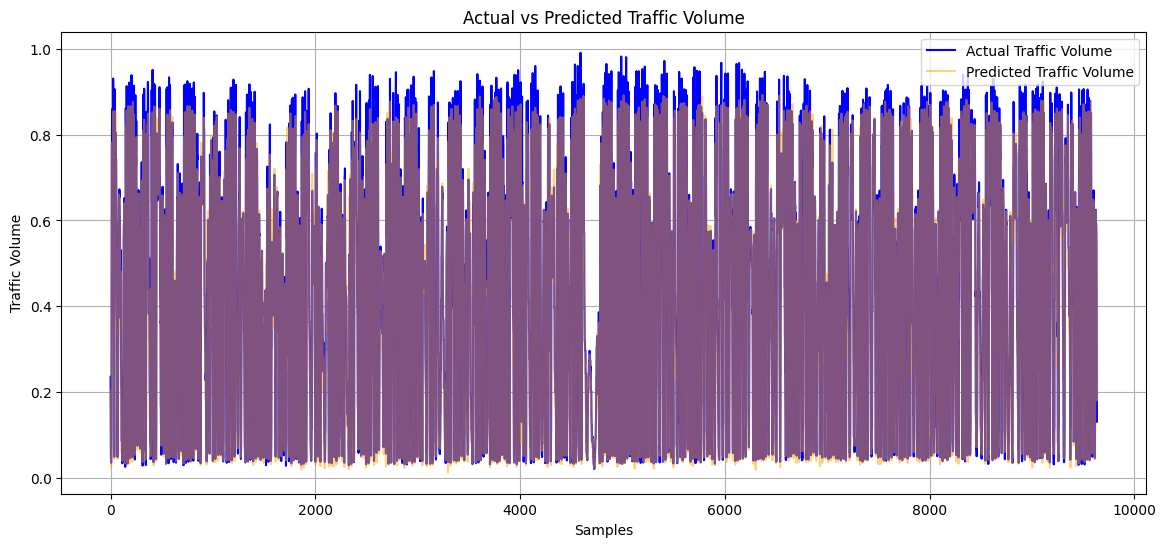

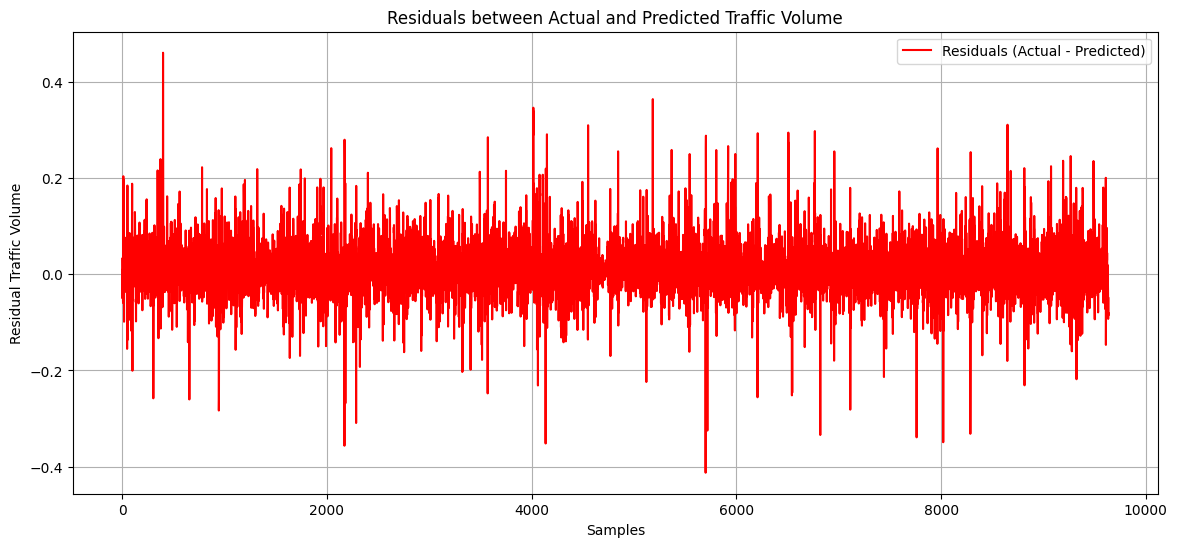

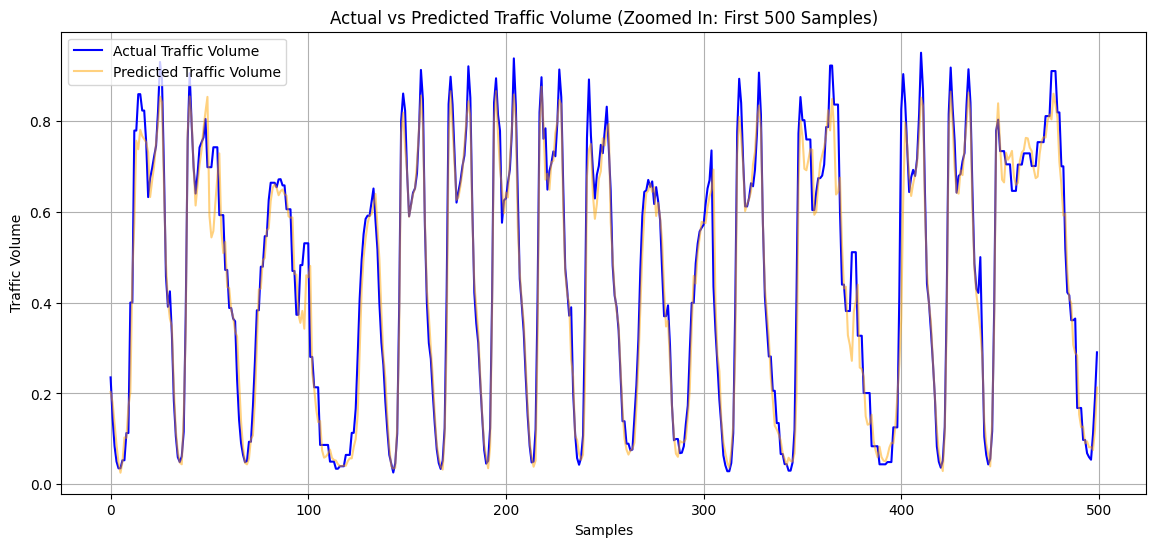

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Making Predictions and Evaluating the Model

# 1. Make predictions directly on X_test
y_pred = model.predict(X_test)

# 2. Inverse transform the predictions to the original scale
y_pred_inv = np.zeros((y_pred.shape[0], df_scaled.shape[1]))  # Shape to match the full features
y_pred_inv[:, -1] = y_pred.flatten()  # Assign predictions to the last column
y_pred_scaled = scaler.inverse_transform(y_pred_inv)[:, -1]

# 3. Print shapes for verification
print(f"Predictions shape: {y_pred.shape}")
print(f"Inverse transformed predictions shape: {y_pred_scaled.shape}")

# 4. Inverse transform the actual values to the original scale
y_test_inv = np.zeros((y_test.shape[0], df_scaled.shape[1]))  # Create the same shape for y_test
y_test_inv[:, -1] = y_test.flatten()  # Assign actual values to the last column
y_test_scaled = scaler.inverse_transform(y_test_inv)[:, -1]

# 5. Calculate additional performance metrics
# Mean Squared Error (MSE)
mse_value = mean_squared_error(y_test_scaled, y_pred_scaled)
print(f"Mean Squared Error: {mse_value:.2f}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
print(f"Mean Absolute Error: {mae:.2f}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse_value)  # Calculate RMSE
print(f"Root Mean Squared Error: {rmse:.2f}")

# R-squared score
r2 = r2_score(y_test_scaled, y_pred_scaled)
print(f"R-squared Score: {r2:.2f}")

# 6. Visualize the predictions vs actual values with transparency
plt.figure(figsize=(14, 6))
plt.plot(y_test_scaled, label='Actual Traffic Volume', color='blue')
plt.plot(y_pred_scaled, label='Predicted Traffic Volume', color='orange', alpha=0.5)  # Add transparency
plt.title('Actual vs Predicted Traffic Volume')
plt.xlabel('Samples')
plt.ylabel('Traffic Volume')
plt.legend()
plt.grid()  # Add grid for better readability
plt.show()

# 7. Visualize residuals (error between actual and predicted values)
residuals = y_test_scaled - y_pred_scaled
plt.figure(figsize=(14, 6))
plt.plot(residuals, label='Residuals (Actual - Predicted)', color='red')
plt.title('Residuals between Actual and Predicted Traffic Volume')
plt.xlabel('Samples')
plt.ylabel('Residual Traffic Volume')
plt.legend()
plt.grid()  # Add grid for better readability
plt.show()

# 8. Optionally, zoom into the first 500 samples for clearer comparison
plt.figure(figsize=(14, 6))
plt.plot(y_test_scaled[:500], label='Actual Traffic Volume', color='blue')
plt.plot(y_pred_scaled[:500], label='Predicted Traffic Volume', color='orange', alpha=0.5)  # Add transparency
plt.title('Actual vs Predicted Traffic Volume (Zoomed In: First 500 Samples)')
plt.xlabel('Samples')
plt.ylabel('Traffic Volume')
plt.legend()
plt.grid()
plt.show()


Finally, we evaluate the model's performance by making predictions on the test dataset and comparing them to actual values.

1. Reshape for Predictions: The test data is reshaped similarly to the training data for compatibility with the LSTM model.

2. Make Predictions: We use the trained model to predict traffic volume on the test set.

3. Inverse Transformation: Since we normalized the data earlier, we must inverse-transform the predicted and actual values to their original scale for meaningful evaluation.

4. Visualize Predictions: Plotting the actual vs. predicted values allows us to visually assess the model's performance.

5. Calculate Error Metrics: Finally, we compute the Mean Squared Error (MSE) to quantify the model's accuracy in predicting traffic volumes.


---



Building a predictive model for traffic volume using Long Short-Term Memory (LSTM) networks involves a structured workflow that is crucial for achieving accurate and reliable outcomes. Each phase of the process contributes to the model's overall performance, enabling us to harness the power of time series data effectively. Here’s a more detailed conclusion that captures the essence of the workflow:

Conclusion
1. The process of constructing a predictive model for traffic volume utilizing LSTM networks is not merely a sequence of coding tasks; it is a comprehensive framework that integrates various methodologies to ensure the model's effectiveness.

2. Data Loading and Preprocessing: The foundation of any machine learning model lies in the quality and structure of the data. Proper data loading and preprocessing—such as normalization, handling missing values, and feature engineering—are essential to transform raw data into a suitable format for modeling. This phase not only enhances the model's ability to learn but also mitigates potential biases in predictions.

3. Data Splitting: Dividing the dataset into training and testing subsets is a critical step in evaluating the model's performance. By ensuring that the model is trained on one set and validated on another, we can effectively gauge its ability to generalize to unseen data. This step helps avoid overfitting, a common pitfall in deep learning where the model performs well on training data but fails on new inputs.

4. Model Construction: Designing the LSTM architecture involves making key decisions about the number of layers, the number of units per layer, and dropout rates to prevent overfitting. Understanding the rationale behind these choices allows for customization of the model to better capture the patterns in the time series data.

5. Training the Model: The training phase, enhanced by techniques such as early stopping, ensures that the model learns from the data efficiently without unnecessary computations. Monitoring validation loss during training provides insights into when the model reaches its optimal performance, enabling a balance between training time and prediction accuracy.

6. Evaluation Metrics: After training, using robust evaluation metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared provides a clear picture of the model's performance. These metrics help quantify the model’s predictive capabilities and allow for comparison with alternative models or methodologies.

7. Visual Analysis: The final step of visualizing predictions against actual values not only serves as a diagnostic tool but also enhances the interpretability of the results. Graphical representations provide immediate insights into the model's performance and can highlight areas for potential improvement.

In summary, this structured workflow encapsulates the critical phases necessary for building an effective predictive model using LSTM networks. By understanding and optimizing each step—from data preparation to model evaluation—we enhance the likelihood of achieving accurate predictions. This rigorous approach not only contributes to better model performance but also builds a foundation for future developments, whether by refining the current model or exploring new methodologies. Through continuous evaluation and adaptation, the predictive model can evolve, ensuring it remains relevant and effective in real-world applications, particularly in dynamic fields such as traffic volume forecasting.






